In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
DATA_FOLDER = 'data/'
QUOTEBANK_2020 = DATA_FOLDER+ "quotes-2020.json.bz2"
QUOTEBANK_2019 = DATA_FOLDER+ "quotes-2019.json.bz2"
QUOTEBANK_2017 = DATA_FOLDER+ "quotes-2017.json.bz2"
QUOTEBANK_2015 = DATA_FOLDER+ "quotes-2015.json.bz2"
QUOTEBANK_2018 = DATA_FOLDER+ "quotes-2018.json.bz2"
QUOTEBANK_2016 = DATA_FOLDER+ "quotes-2016.json.bz2"

GENEREATED_DATA = 'generated_data/'

PARQUET_FILE = GENEREATED_DATA +  "speaker_attributes.parquet"

In [19]:
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')

In [20]:
# Concatenate into one dataframes the dataframes from each pickle file. 
#df = pd.concat([pd.read_pickle(GENEREATED_DATA+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)
df = pd.read_json("../data/quotes-2019-nytimes.json.bz2", lines=True, compression='bz2')

In [21]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E


In [22]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\galan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
import seaborn as sns

In [48]:
def visualise_sentiments(data):
    plt.figure(1, figsize=(25, 5))
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [49]:
sentence = df['quotation'].loc[1]

In [50]:
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5994}

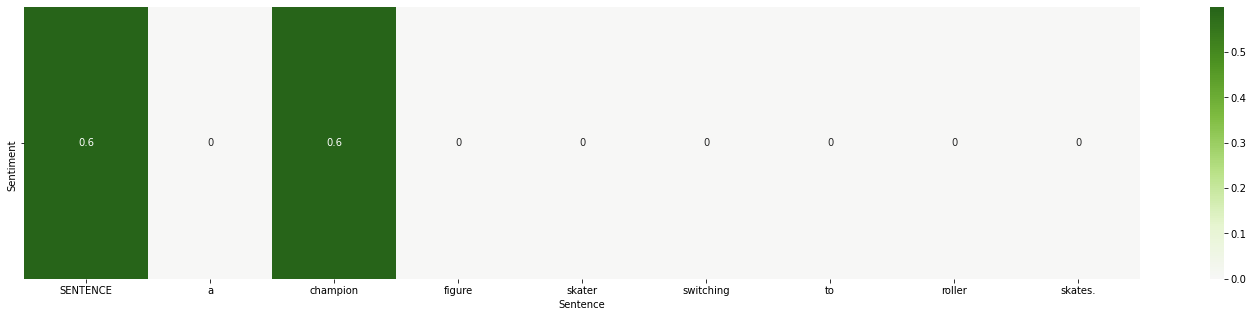

In [51]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})